1.2.

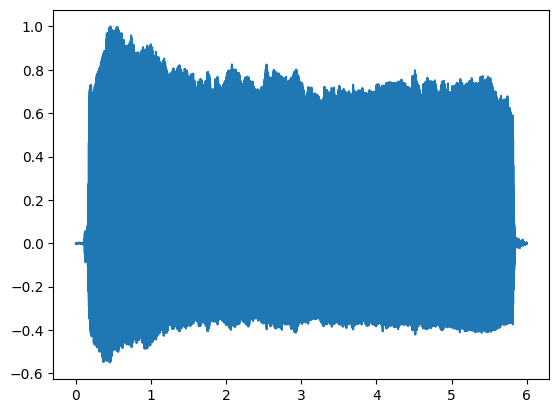

In [2]:
from thinkdsp import read_wave
filename = "608181__jr_gomez__fasax_2.wav"
wave = read_wave(filename)
wave.plot()

In [ ]:
wave.make_audio()

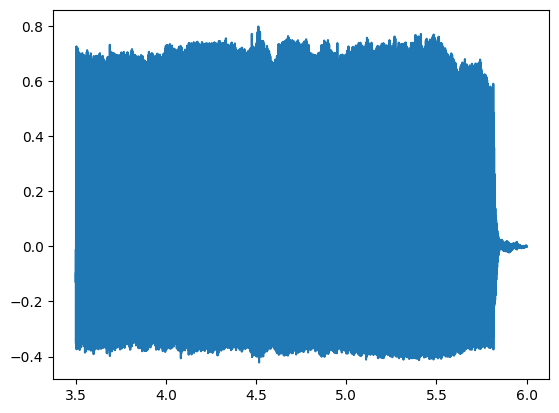

In [ ]:
c4_start = 3.5
c4_duration = 3
segment = wave.segment(c4_start, c4_duration)
segment.plot()

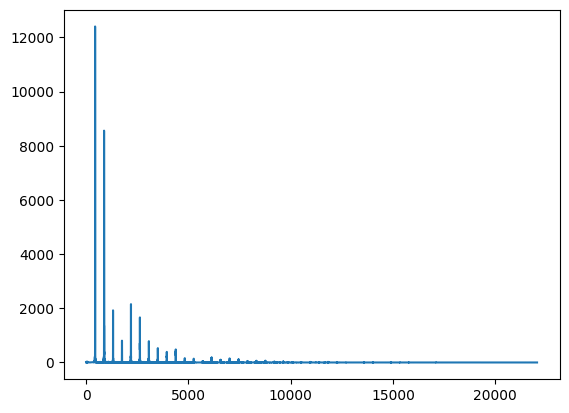

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot()

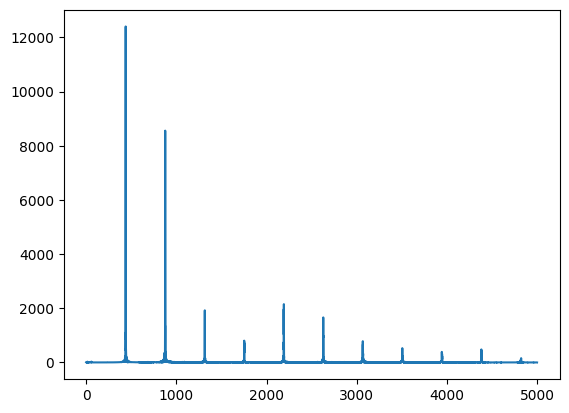

In [ ]:
spectrum.plot(high=5000)

In [ ]:
list(filter(lambda x: x[1] < 700, spectrum.peaks()))[0]

(np.float64(12404.382651369848), np.float64(438.40000000000003))

Приблизительно A4

Writing lp.wav


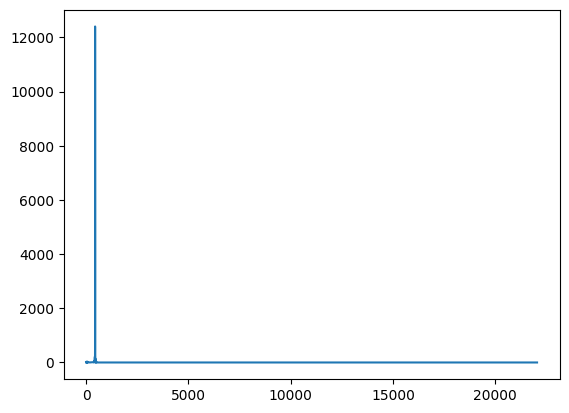

In [ ]:
lp_spec = spectrum
lp_spec.low_pass(500)
lp_spec.plot()
lp_wave = lp_spec.make_wave()
lp_wave.normalize()
lp_wave.apodize()
lp_wave.write("lp.wav")

Writing hp.wav


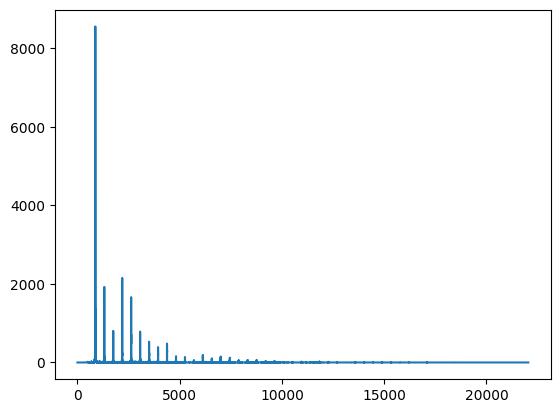

In [ ]:
spectrum = segment.make_spectrum()
hp_spec = spectrum
hp_spec.high_pass(500)
hp_spec.plot()
hp_wave = hp_spec.make_wave()
hp_wave.normalize()
hp_wave.apodize()
hp_wave.write("hp.wav")

Writing bs.wav


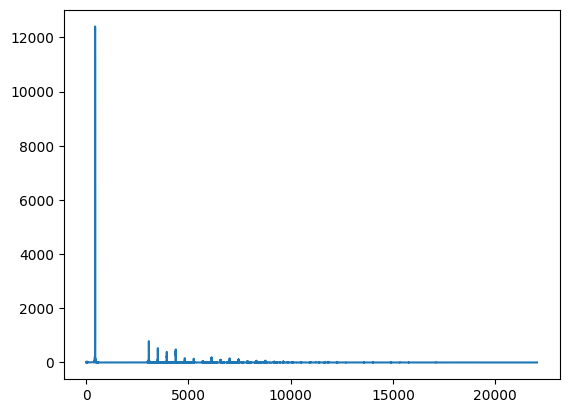

In [ ]:
spectrum = segment.make_spectrum()
bs_spec = spectrum
bs_spec.band_stop(600, 3000)
bs_spec.plot()
bs_wave = bs_spec.make_wave()
bs_wave.normalize()
bs_wave.apodize()
bs_wave.write("bs.wav")

1.3.

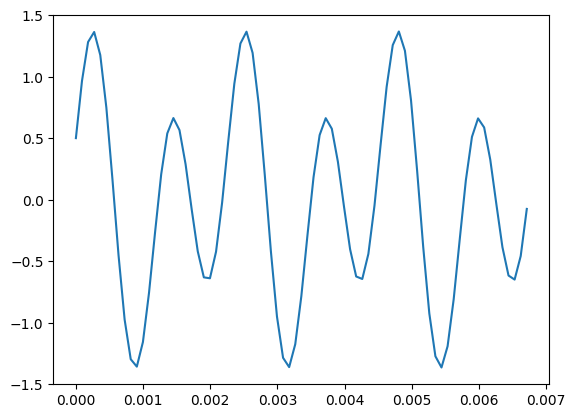

In [ ]:
from thinkdsp import SinSignal, CosSignal
sig_sin = SinSignal(880, 1)
sig_cos = CosSignal(440, 0.5)
sig = sig_sin + sig_cos
sig.plot()

In [ ]:
sig_wave = sig.make_wave(1)
sig_wave.normalize()
sig_wave.write("signal.wav")

Writing signal.wav


In [ ]:
sig_wave.make_audio()

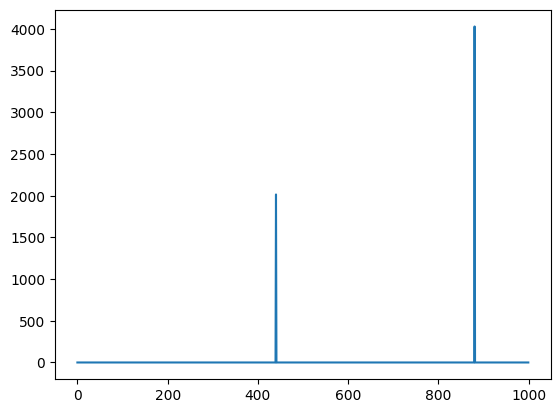

In [ ]:
sig_spectrum = sig_wave.make_spectrum()
sig_spectrum.plot(high = 1000)

Writing signal2.wav


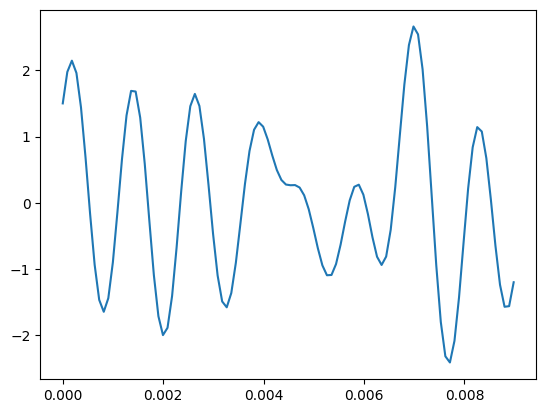

In [ ]:
sig_2 = sig + SinSignal(330.55, 0.5) + CosSignal(723, 1)
sig_2.plot()
sig_wave_2 = sig_2.make_wave(1)
sig_wave_2.normalize()
sig_wave_2.write("signal2.wav")

In [ ]:
sig_wave_2.make_audio()

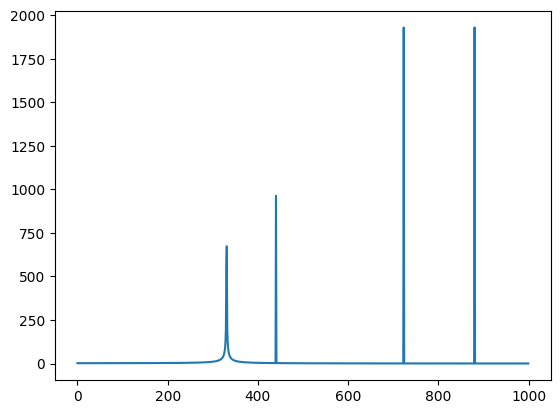

In [ ]:
sig_spectrum_2 = sig_wave_2.make_spectrum()
sig_spectrum_2.plot(high = 1000)

1.4.

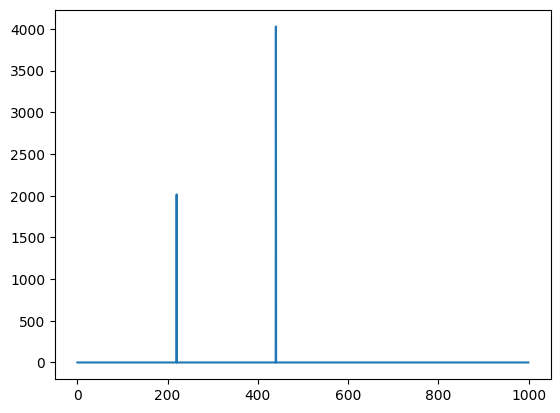

In [ ]:
from thinkdsp import Wave
def stretch(wave: Wave, factor:float):
    return Wave(wave.ys, wave.ts * factor, wave.framerate / factor)

sig_wave_stretched = stretch(sig_wave, 2)
spectrum_stretched = sig_wave_stretched.make_spectrum()
spectrum_stretched.plot(high = 1000)

In [ ]:
list(filter(lambda x: x[1] < 600, spectrum_stretched.peaks()))[0:2]

[(np.float64(4029.8781323043995), np.float64(440.0)),
 (np.float64(2014.939066152202), np.float64(220.0))]